In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import globals as gl
from force import load_mov
from matplotlib import colormaps as cm
from util import lowpass_butter, lowpass_fir
from matplotlib.lines import Line2D

plt.style.use('default')

In [31]:
until_day = 10
days = np.arange(1, until_day + 1, 1)

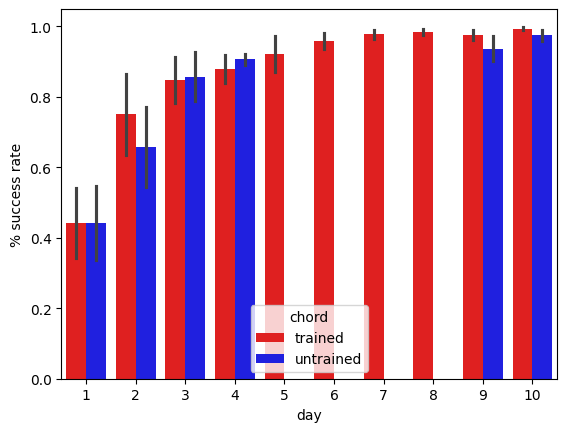

In [32]:
dat = pd.DataFrame()
snS = [101, 102, 103, 104, 105]

for sn in snS:
    for day in days:
        path = os.path.join(gl.baseDir,  'behavioural', f'day{day}', f'efc4_{sn}_single_trial.tsv')
        dat_tmp = pd.read_csv(path, sep='\t')
        dat = pd.concat([dat, dat_tmp], ignore_index=True)

dat = dat.groupby(['subNum', 'session', 'day', 'chord']).mean(numeric_only=True).reset_index()
sns.barplot(x='day', y='trialPoint', hue='chord', data=dat, errorbar='se', palette=['red', 'blue'],hue_order=['trained', 'untrained'])

plt.ylabel('% success rate')
plt.show()

/tmp/ipykernel_349184/3060342360.py:36: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.lineplot(data=dat, ax=ax, x='BN', y='ET', hue='chord', errorbar='se', lw=1,
/tmp/ipykernel_349184/3060342360.py:36: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.lineplot(data=dat, ax=ax, x='BN', y='ET', hue='chord', errorbar='se', lw=1,
/tmp/ipykernel_349184/3060342360.py:36: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.lineplot(data=dat, ax=ax, x='BN', y='ET', hue='chord', errorbar='se', lw=1,
/tmp/ipykernel_349184/3060342360.py:36: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.lineplot(data=dat, ax=ax, x='BN', y='ET', hue='chord', errorbar='se', lw=1,


Text(0.5, 1.0, 'Execution time')

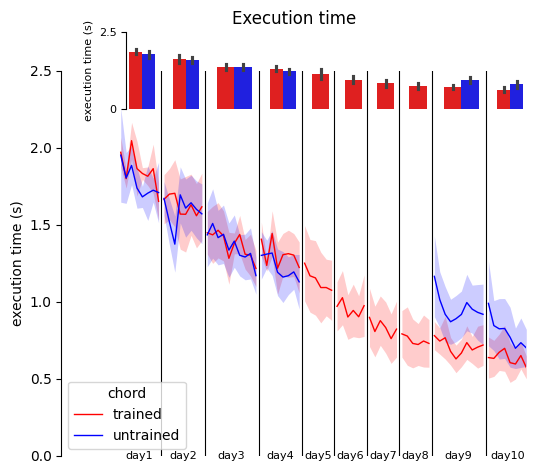

In [86]:
fig, ax = plt.subplots(figsize=(6, 5))

max_bn = 0

for day in days:
    dat = pd.DataFrame()
    for sn in snS:
        path = os.path.join(gl.baseDir,  'behavioural', f'day{day}', f'efc4_{sn}_single_trial.tsv')
        dat_tmp = pd.read_csv(path, sep='\t')
        dat_tmp['day'] = day  # <--- Add day column
        dat_tmp = dat_tmp[dat_tmp['trialPoint']==1]
        dat = pd.concat([dat, dat_tmp], ignore_index=True)

    dat['BN'] = dat['BN'] + max_bn
    max_bn = dat.BN.max()
    min_bn = dat.BN.min()
    ax.text((max_bn + min_bn) / 2, 0, f'day{day}', ha='center', va='center', fontsize=8)
    ax.axvline(max_bn + .5, color='k', linestyle='-', lw=.8)
    ax.set_xticks([])
    ax.spines[['bottom', 'top', 'right']].set_visible(False)
    dat = dat.groupby(['subNum', 'day', 'chord', 'BN']).mean(numeric_only=True).reset_index()

    inset = ax.inset_axes([min_bn + 1, 2.25, max_bn - min_bn - 1, .5], transform=ax.transData)
    sns.barplot(data=dat, ax=inset, hue='chord', y='ET', legend=False, palette=['red', 'blue'],hue_order=['trained', 'untrained'])
    inset.spines[['top', 'right', 'bottom']].set_visible(False)
    inset.set_xticks([])
    inset.set_ylim(0, 2.5)
    inset.set_yticks([0, 2.5], labels=[0, 2.5],fontsize=8)


    if day==1:
        sns.lineplot(data=dat, ax=ax, x='BN', y='ET', hue='chord', errorbar='se', lw=1,
                 palette=['red', 'blue'], err_kws={'linewidth': 0}, legend=True)
        inset.set_ylabel('execution time (s)', fontsize=8)
    else:
        sns.lineplot(data=dat, ax=ax, x='BN', y='ET', hue='chord', errorbar='se', lw=1,
                 palette=['red', 'blue'],err_kws={'linewidth': 0}, legend=False)
        inset.spines[['left']].set_visible(False)
        inset.set_yticks([])
        inset.set_ylabel('', fontsize=8)

ax.set_ylim([0, 2.5])
ax.set_xlim([-10, max_bn])
ax.spines['left'].set_bounds(0, 2.5)
ax.set_ylabel('execution time (s)')

ax.set_title('Execution time')

plt.show()


/tmp/ipykernel_349184/2550714500.py:36: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.lineplot(data=dat, ax=ax, x='BN', y='MD', hue='chord', errorbar='se', lw=1,
/tmp/ipykernel_349184/2550714500.py:36: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.lineplot(data=dat, ax=ax, x='BN', y='MD', hue='chord', errorbar='se', lw=1,
/tmp/ipykernel_349184/2550714500.py:36: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.lineplot(data=dat, ax=ax, x='BN', y='MD', hue='chord', errorbar='se', lw=1,
/tmp/ipykernel_349184/2550714500.py:36: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.lineplot(data=dat, ax=ax, x='BN', y='MD', hue='chord', errorbar='se', lw=1,


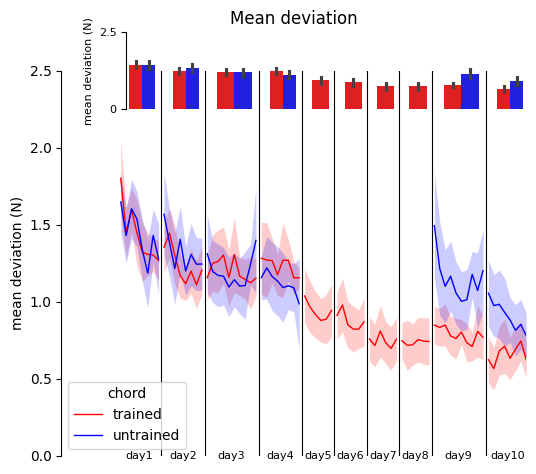

In [87]:
fig, ax = plt.subplots(figsize=(6, 5))

max_bn = 0

for day in days:
    dat = pd.DataFrame()
    for sn in snS:
        path = os.path.join(gl.baseDir,  'behavioural', f'day{day}', f'efc4_{sn}_single_trial.tsv')
        dat_tmp = pd.read_csv(path, sep='\t')
        dat_tmp['day'] = day  # <--- Add day column
        dat_tmp = dat_tmp[dat_tmp['trialPoint']==1]
        dat = pd.concat([dat, dat_tmp], ignore_index=True)

    dat['BN'] = dat['BN'] + max_bn
    max_bn = dat.BN.max()
    min_bn = dat.BN.min()
    ax.text((max_bn + min_bn) / 2, 0, f'day{day}', ha='center', va='center', fontsize=8)
    ax.axvline(max_bn + .5, color='k', linestyle='-', lw=.8)
    ax.set_xticks([])
    ax.spines[['bottom', 'top', 'right']].set_visible(False)
    dat = dat.groupby(['subNum', 'day', 'chord', 'BN']).mean(numeric_only=True).reset_index()

    inset = ax.inset_axes([min_bn + 1, 2.25, max_bn - min_bn - 1, .5], transform=ax.transData)
    sns.barplot(data=dat, ax=inset, hue='chord', y='MD', legend=False, palette=['red', 'blue'],hue_order=['trained', 'untrained'])
    inset.spines[['top', 'right', 'bottom']].set_visible(False)
    inset.set_xticks([])
    inset.set_ylim(0, 2.5)
    inset.set_yticks([0, 2.5], labels=[0, 2.5],fontsize=8)


    if day==1:
        sns.lineplot(data=dat, ax=ax, x='BN', y='MD', hue='chord', errorbar='se', lw=1,
                 palette=['red', 'blue'], err_kws={'linewidth': 0}, legend=True)
        inset.set_ylabel('mean deviation (N)', fontsize=8)
    else:
        sns.lineplot(data=dat, ax=ax, x='BN', y='MD', hue='chord', errorbar='se', lw=1,
                 palette=['red', 'blue'],err_kws={'linewidth': 0}, legend=False)
        inset.spines[['left']].set_visible(False)
        inset.set_yticks([])
        inset.set_ylabel('', fontsize=8)

ax.set_ylim([0, 2.5])
ax.set_xlim([-10, max_bn])
ax.spines['left'].set_bounds(0, 2.5)
ax.set_ylabel('mean deviation (N)')

ax.set_title('Mean deviation')

plt.show()


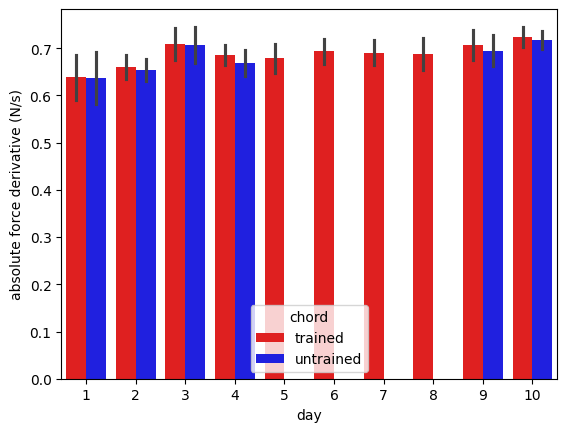

In [38]:
dat = pd.DataFrame()
for sn in snS:
    for d, day in enumerate(days):
        dat_tmp = pd.read_csv(os.path.join(gl.baseDir, 'behavioural', f'day{day}', f'efc4_{sn}_single_trial.tsv'), sep='\t')
        dat_tmp = dat_tmp[dat_tmp['trialPoint']==1]
        dat_tmp['day'] = day
        dat_tmp_melt = dat_tmp.melt(id_vars=['subNum', 'chordID', 'chord', 'TN', 'BN', 'day'],value_vars=['thumb_der', 'index_der', 'middle_der', 'ring_der', 'pinkie_der'], var_name='finger', value_name='force_der')
        dat = pd.concat([dat, dat_tmp_melt], ignore_index=True)

dat = dat.groupby(['subNum', 'day', 'chord']).mean(numeric_only=True).reset_index()
sns.barplot(x='day', y='force_der', data=dat, hue='chord',
            errorbar='se',
            palette=['red', 'blue'],hue_order=['trained', 'untrained'])

plt.ylabel('absolute force derivative (N/s)')
plt.show()